In [1]:
import os 

import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = 'plots/'

from pypower import BaseMatrix
from desilike.samples import Profiles, Chain, plotting
from emulator_fit import get_power_likelihood, get_corr_likelihood, get_footprint

tracer = 'ELG'
region = 'SGC'
completeness = 'complete_'
stat = 'power'
theory_name = 'velocileptors'
rp_cut = 2.5
xinmax = True
solve = True
fc = ''
imock = None
direct = False

In [2]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/'

In [3]:
factorin = 10
factorout = 5
xlim = (0.01, 0.6)

rp_cuts = [10, 20, 30]

wm = BaseMatrix.load(os.path.join(data_dir, 'windows/wm_mock0_ELG_complete_SGC.npy'))
wm_rpcut = BaseMatrix.load(os.path.join(data_dir, 'windows/wm_mock0_ELG_complete_SGC_rp2.5.npy'))

def unpack_wm(wmatrix):
    window_matrix = wmatrix.deepcopy()
    window_matrix.slice_x(slicein=slice(0, len(window_matrix.xin[0]) // factorin * factorin, factorin), sliceout=slice(0, len(window_matrix.xout[0]) // factorout * factorout, factorout))
    window_matrix.select_x(xoutlim=(0.01, 0.25))
    window_matrix.select_x(xinlim=xlim)
    return window_matrix, window_matrix.unpacked()

wm, a = unpack_wm(wm)
wm_rpcut, a_rpcut = unpack_wm(wm_rpcut)

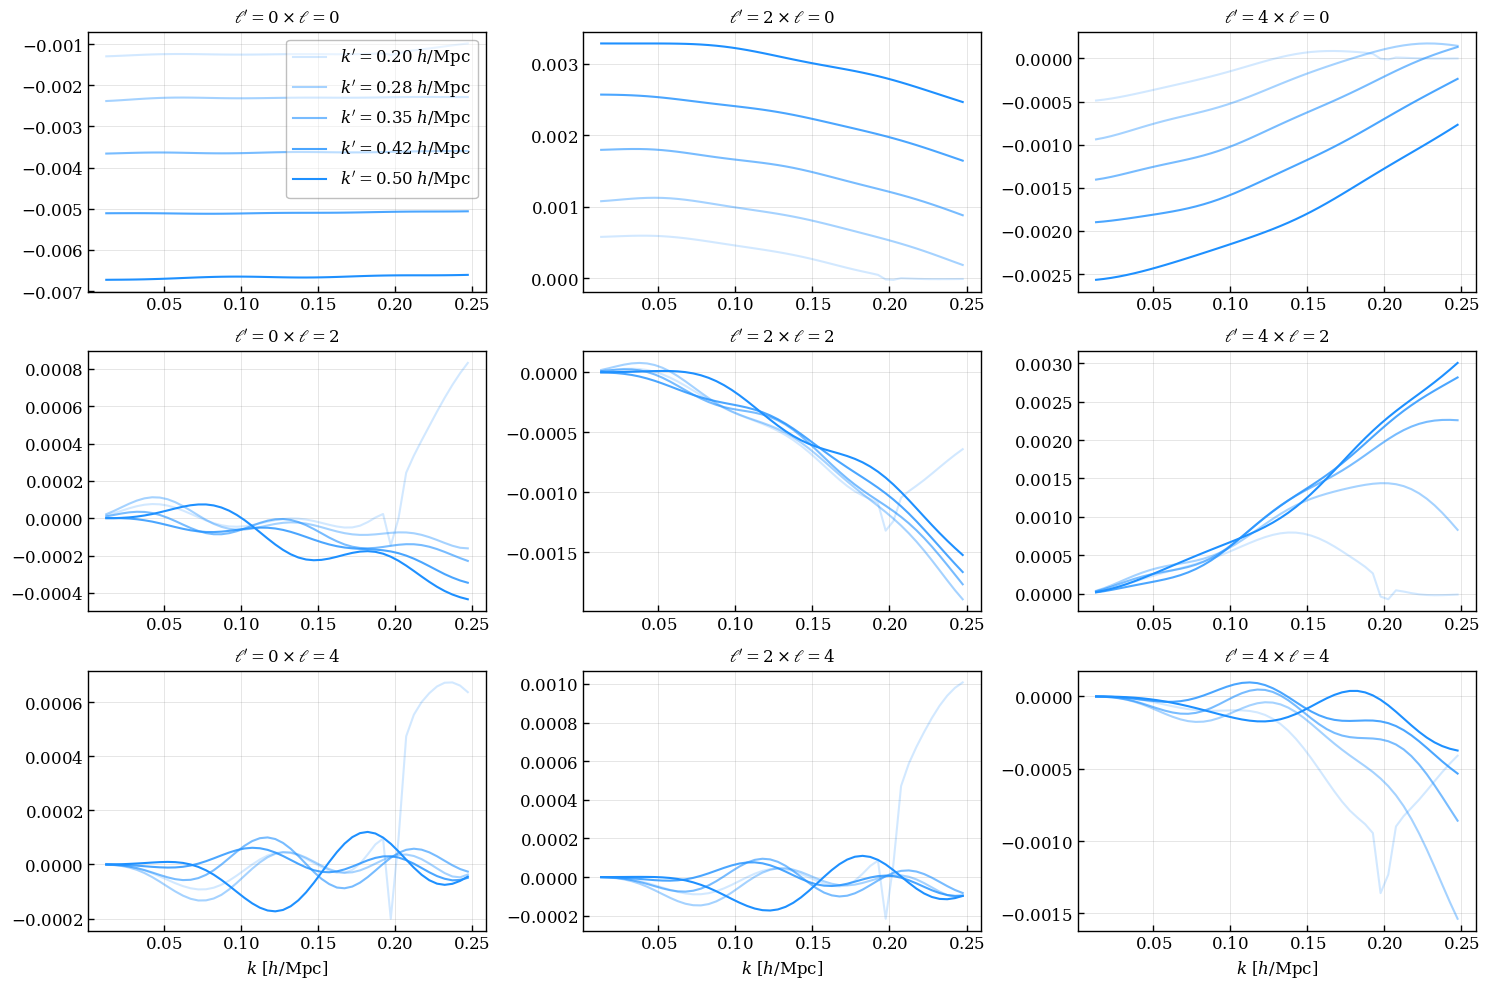

In [4]:
kprime_vals = np.linspace(0.2, 0.5, 5)
indexin_list = [np.abs(wm.xin[0] - kval).argmin() for kval in kprime_vals]

fig, lax = plt.subplots(len(wm.projsout), len(wm.projsin), figsize=(15, 10))
for iin, projin in enumerate(wm.projsin):
    for iout, projout in enumerate(wm.projsout):
        ax = lax[iout][iin]
        # Indices in approximative window matrix
        norm = 1.
        for i, indexin in enumerate(indexin_list):
            ax.plot(wm.xout[iin], (a_rpcut[iin][iout][indexin, :] - a[iin][iout][indexin, :]) / norm, label=r'$k^\prime = {:.2f} \; h/\mathrm{{Mpc}}$'.format(kprime_vals[i]), color='dodgerblue', alpha=(i+1)/len(kprime_vals))
        ax.set_title(r'$\ell^\prime = {:d} \times \ell = {:d}$'.format(projin.ell, projout.ell))
        ax.grid(True)
        if iout == len(wm.projsout) - 1: ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: lax[iout][iin].legend()
plt.savefig(os.path.join(plots_dir, 'wmatrix_rpcut_complete_diff_fixedkin.png'), dpi=300)
plt.show()